# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("Mall_Customers.csv")
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
df1.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df1.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


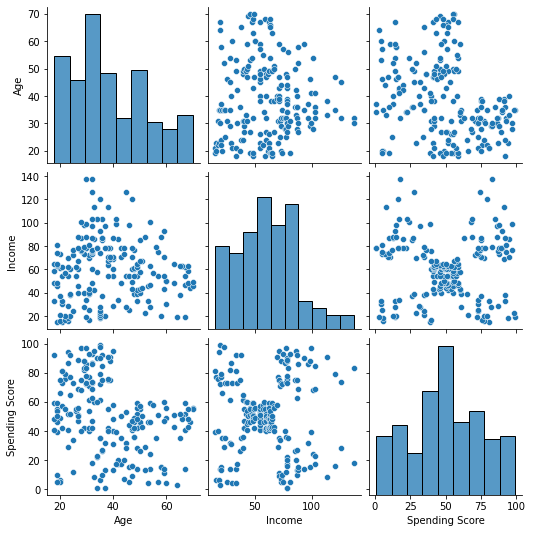

In [4]:
sns.pairplot(df1[["Age", "Income", "Spending Score"]])

## Clustering mall customer segmentation data

In [5]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++")
kmeans = kmeans.fit(df1[["Spending Score", "Income"]])
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

In [6]:
df1["Clusters"] = kmeans.labels_
df1.head()

,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [7]:
df1["Clusters"].value_counts()

1    81
2    39
3    35
0    23
4    22
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Spending Score'>

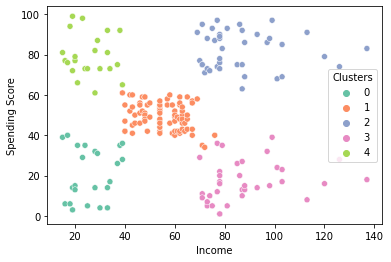

In [8]:
sns.scatterplot(data = df1, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [47]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
#print(clustered_dataframes[1])

def split_dataframes_by_position(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = len(i) // splits
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes_by_position(clustered_dataframes, 3)
#print(split_clustered_dataframes[14])

"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 3)
print(diverse_groups[0])

     CustomerID  Gender  Age  Income  Spending Score  Clusters
0             1    Male   19      15              39         0
2             3  Female   20      16               6         0
4             5  Female   31      17              40         0
6             7  Female   35      18               6         0
8             9    Male   64      19               3         0
..          ...     ...  ...     ...             ...       ...
140         141  Female   57      75               5         3
144         145    Male   25      77              12         3
146         147    Male   48      77              36         3
148         149  Female   34      78              22         3
150         151    Male   43      78              17         3

[65 rows x 6 columns]


## Visualising diverse groups

<AxesSubplot:xlabel='Income', ylabel='Spending Score'>

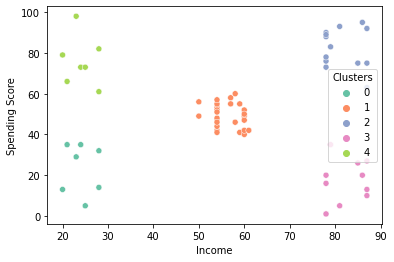

In [53]:
group = diverse_groups[1]
sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")